In [1]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
# pip install pyLDAvis
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
df = pd.read_csv('amazon_reviews_us_Mobile_Electronics_v1_00.tsv', sep = '\t', error_bad_lines = False)
# https://s3.amazonaws.com/amazon-reviews-pds/tsv/index.txt

b'Skipping line 35246: expected 15 fields, saw 22\n'
b'Skipping line 87073: expected 15 fields, saw 22\n'


In [3]:
df.shape

(104852, 15)

In [4]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,217304173,BlackVue DR600GW-PMP,Mobile_Electronics,5.0,0.0,0.0,N,Y,Very Happy!,"As advertised. Everything works perfectly, I'm...",2015-08-31
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,137313254,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5.0,0.0,1.0,N,Y,five star,it's great,2015-08-31
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5.0,0.0,0.0,N,Y,great cables,These work great and fit my life proof case fo...,2015-08-31
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,221169481,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4.0,0.0,0.0,N,Y,Work very well but couldn't get used to not he...,Work very well but couldn't get used to not he...,2015-08-31
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2.0,0.0,0.0,N,Y,Cameras has battery issues,"Be careful with these products, I have bought ...",2015-08-31


In [5]:
df = df[df['verified_purchase'] == "Y"]

In [6]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      2
review_body          0
review_date          0
dtype: int64

In [7]:
df.dropna(axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)

In [8]:
reviews_data = df[['star_rating','review_body']]
reviews_data = reviews_data.drop_duplicates()
reviews_data.shape

(86277, 2)

In [9]:
reviews_data.head()

,star_rating,review_body
0,5.0,"As advertised. Everything works perfectly, I'm..."
1,5.0,it's great
2,5.0,These work great and fit my life proof case fo...
3,4.0,Work very well but couldn't get used to not he...
4,2.0,"Be careful with these products, I have bought ..."


In [10]:
reviews_data['star_rating'].value_counts()

5.0    42651
4.0    15282
1.0    14056
3.0     8244
2.0     6044
Name: star_rating, dtype: int64

In [11]:
reviews_5_df = reviews_data[reviews_data.star_rating == 5.0]
reviews_4_df = reviews_data[reviews_data.star_rating == 4.0]
reviews_3_df = reviews_data[reviews_data.star_rating == 3.0]
reviews_2_df = reviews_data[reviews_data.star_rating == 2.0]
reviews_1_df = reviews_data[reviews_data.star_rating == 1.0]

reviews_5_df.reset_index(drop = True, inplace = True)
reviews_4_df.reset_index(drop = True, inplace = True)
reviews_3_df.reset_index(drop = True, inplace = True)
reviews_2_df.reset_index(drop = True, inplace = True)
reviews_1_df.reset_index(drop = True, inplace = True)

reviews_1_df_upsampled = resample(reviews_1_df, 
                                 replace = True,    
                                 n_samples = 30000,   
                                 random_state = 42)

reviews_2_df_upsampled = resample(reviews_2_df, 
                                 replace = True,    
                                 n_samples = 30000,   
                                 random_state = 42)

reviews_3_df_upsampled = resample(reviews_3_df, 
                                 replace = True,    
                                 n_samples = 30000,   
                                 random_state = 42)

reviews_4_df_upsampled = resample(reviews_4_df, 
                                 replace = True,    
                                 n_samples = 30000,   
                                 random_state = 42)

reviews_5_df_downsampled = resample(reviews_5_df, 
                                 replace = True,    
                                 n_samples = 30000,   
                                 random_state = 42)

reviews_1_df_upsampled.reset_index(drop = True, inplace = True)
reviews_2_df_upsampled.reset_index(drop = True, inplace = True)
reviews_3_df_upsampled.reset_index(drop = True, inplace = True)
reviews_4_df_upsampled.reset_index(drop = True, inplace = True)
reviews_5_df_downsampled.reset_index(drop = True, inplace = True)

In [12]:
reviews_data = pd.concat([reviews_1_df_upsampled, reviews_2_df_upsampled, reviews_3_df_upsampled, reviews_4_df_upsampled, reviews_5_df_downsampled], axis = 0)
reviews_data = reviews_data.sample(frac = 1) 
reviews_data.reset_index(drop = True, inplace = True)
reviews_data.head()

,star_rating,review_body
0,1.0,Funky run of the mill case but called a sports...
1,1.0,The car DVR arrived packeged with a 16 GB card...
2,3.0,Not the best and will give you some good bass ...
3,2.0,It stop working after 2 days I was really upse...
4,2.0,This is a great product for the iPhone however...


In [13]:
reviews_data['star_rating'].value_counts()

5.0    30000
4.0    30000
3.0    30000
2.0    30000
1.0    30000
Name: star_rating, dtype: int64

In [14]:
reviews_data["review_body"] = reviews_data["review_body"].str.lower()

In [15]:
reviews_data["reviews_pun_off"] = reviews_data["review_body"]
for i in string.punctuation:
    if i == "'":
        reviews_data["reviews_pun_off"] = reviews_data["reviews_pun_off"].str.replace(i,'')
    else:
        reviews_data["reviews_pun_off"] = reviews_data["reviews_pun_off"].str.replace(i,' ')  
reviews_data.head()

,star_rating,review_body,reviews_pun_off
0,1.0,funky run of the mill case but called a sports...,funky run of the mill case but called a sports...
1,1.0,the car dvr arrived packeged with a 16 gb card...,the car dvr arrived packeged with a 16 gb card...
2,3.0,not the best and will give you some good bass ...,not the best and will give you some good bass ...
3,2.0,it stop working after 2 days i was really upse...,it stop working after 2 days i was really upse...
4,2.0,this is a great product for the iphone however...,this is a great product for the iphone however...


In [16]:
customized_stop_words = "i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,own,same,s,t,can,will,just,can,will,just,should,should've,now,d,ll,m,o,re,ve,y,ma".split(',')

In [17]:
stop = stopwords.words('english')
def remove_stopwords(review):
    return " ".join([i for i in str(review).split() if i not in customized_stop_words])
reviews_data["reviews_stop_rem"] = reviews_data["reviews_pun_off"].apply(lambda review: remove_stopwords(review))
reviews_data.head()

,star_rating,review_body,reviews_pun_off,reviews_stop_rem
0,1.0,funky run of the mill case but called a sports...,funky run of the mill case but called a sports...,funky run mill case called sports case photo l...
1,1.0,the car dvr arrived packeged with a 16 gb card...,the car dvr arrived packeged with a 16 gb card...,car dvr arrived packeged 16 gb card inserted s...
2,3.0,not the best and will give you some good bass ...,not the best and will give you some good bass ...,not best give good bass blew rockford fosgates...
3,2.0,it stop working after 2 days i was really upse...,it stop working after 2 days i was really upse...,stop working 2 days really upset shipped time ...
4,2.0,this is a great product for the iphone however...,this is a great product for the iphone however...,great product iphone however needed ipod touch...


In [18]:
def remove_2_letter_words(review):
    return " ".join([i for i in str(review).split() if len(i) > 2])
reviews_data["reviews_after_2_letter_rem"] = reviews_data["reviews_stop_rem"].apply(lambda review: remove_2_letter_words(review))
reviews_data.head()

,star_rating,review_body,reviews_pun_off,reviews_stop_rem,reviews_after_2_letter_rem
0,1.0,funky run of the mill case but called a sports...,funky run of the mill case but called a sports...,funky run mill case called sports case photo l...,funky run mill case called sports case photo l...
1,1.0,the car dvr arrived packeged with a 16 gb card...,the car dvr arrived packeged with a 16 gb card...,car dvr arrived packeged 16 gb card inserted s...,car dvr arrived packeged card inserted card dv...
2,3.0,not the best and will give you some good bass ...,not the best and will give you some good bass ...,not best give good bass blew rockford fosgates...,not best give good bass blew rockford fosgates...
3,2.0,it stop working after 2 days i was really upse...,it stop working after 2 days i was really upse...,stop working 2 days really upset shipped time ...,stop working days really upset shipped time sa...
4,2.0,this is a great product for the iphone however...,this is a great product for the iphone however...,great product iphone however needed ipod touch...,great product iphone however needed ipod touch...


In [19]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_words(review):
    return " ".join([lemmatizer.lemmatize(word) for word in review.split()])

reviews_data["reviews_lemmatized"] = reviews_data["reviews_after_2_letter_rem"].apply(lambda review: lemmatize_words(review))
reviews_data.head()

[nltk_data] Downloading package wordnet to /home/harrish/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,star_rating,review_body,reviews_pun_off,reviews_stop_rem,reviews_after_2_letter_rem,reviews_lemmatized
0,1.0,funky run of the mill case but called a sports...,funky run of the mill case but called a sports...,funky run mill case called sports case photo l...,funky run mill case called sports case photo l...,funky run mill case called sport case photo la...
1,1.0,the car dvr arrived packeged with a 16 gb card...,the car dvr arrived packeged with a 16 gb card...,car dvr arrived packeged 16 gb card inserted s...,car dvr arrived packeged card inserted card dv...,car dvr arrived packeged card inserted card dv...
2,3.0,not the best and will give you some good bass ...,not the best and will give you some good bass ...,not best give good bass blew rockford fosgates...,not best give good bass blew rockford fosgates...,not best give good bass blew rockford fosgates...
3,2.0,it stop working after 2 days i was really upse...,it stop working after 2 days i was really upse...,stop working 2 days really upset shipped time ...,stop working days really upset shipped time sa...,stop working day really upset shipped time sat...
4,2.0,this is a great product for the iphone however...,this is a great product for the iphone however...,great product iphone however needed ipod touch...,great product iphone however needed ipod touch...,great product iphone however needed ipod touch...


In [20]:
def remove_invalid_words(review):
    return " ".join([i for i in str(review).split() if i.isalpha()])

reviews_data["reviews_invalid_words_rem"] = reviews_data["reviews_lemmatized"].apply(lambda review: remove_invalid_words(review))
reviews_data.head()

,star_rating,review_body,reviews_pun_off,reviews_stop_rem,reviews_after_2_letter_rem,reviews_lemmatized,reviews_invalid_words_rem
0,1.0,funky run of the mill case but called a sports...,funky run of the mill case but called a sports...,funky run mill case called sports case photo l...,funky run mill case called sports case photo l...,funky run mill case called sport case photo la...,funky run mill case called sport case photo la...
1,1.0,the car dvr arrived packeged with a 16 gb card...,the car dvr arrived packeged with a 16 gb card...,car dvr arrived packeged 16 gb card inserted s...,car dvr arrived packeged card inserted card dv...,car dvr arrived packeged card inserted card dv...,car dvr arrived packeged card inserted card dv...
2,3.0,not the best and will give you some good bass ...,not the best and will give you some good bass ...,not best give good bass blew rockford fosgates...,not best give good bass blew rockford fosgates...,not best give good bass blew rockford fosgates...,not best give good bass blew rockford fosgates...
3,2.0,it stop working after 2 days i was really upse...,it stop working after 2 days i was really upse...,stop working 2 days really upset shipped time ...,stop working days really upset shipped time sa...,stop working day really upset shipped time sat...,stop working day really upset shipped time sat...
4,2.0,this is a great product for the iphone however...,this is a great product for the iphone however...,great product iphone however needed ipod touch...,great product iphone however needed ipod touch...,great product iphone however needed ipod touch...,great product iphone however needed ipod touch...


In [21]:
nltk.downloader.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()
polarity_scores_vader_compound = []
for i in reviews_data['reviews_invalid_words_rem']:
    polarity_scores_vader_compound.append(vader.polarity_scores(i)['compound'])
reviews_data['sentiment_score'] = polarity_scores_vader_compound

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/harrish/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [22]:
sentiment_score_grouped = pd.cut(reviews_data['sentiment_score'], bins = 5, labels = [1.0,2.0,3.0,4.0,5.0])
reviews_data['sentiment_score_ratings'] = list(pd.Series(sentiment_score_grouped).values)
print(classification_report(list(reviews_data['star_rating']), list(reviews_data['sentiment_score_ratings'])))

              precision    recall  f1-score   support

         1.0       0.47      0.18      0.26     30000
         2.0       0.31      0.21      0.25     30000
         3.0       0.22      0.19      0.20     30000
         4.0       0.20      0.18      0.19     30000
         5.0       0.35      0.75      0.47     30000

    accuracy                           0.30    150000
   macro avg       0.31      0.30      0.28    150000
weighted avg       0.31      0.30      0.28    150000



Thus we can see the accuracy scores are not upto the marks thus inferring the the most used words alone from 
the reviews that has got less polarity scores and proceeding with classification models for classification

In [23]:
from collections import Counter
cnt = Counter()
for text in reviews_data["reviews_invalid_words_rem"].values:
    for word in text.split():
        cnt[word] += 1
        
most_common_words = []
for i in cnt.most_common(20):
    most_common_words.append(i[0])
def remove_most_common_words(review):
    return " ".join([i for i in str(review).split() if i not in most_common_words])

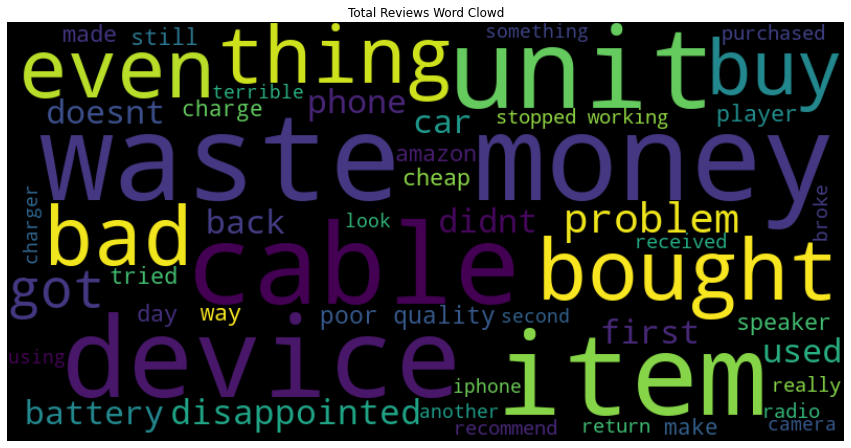

In [24]:
from wordcloud import  WordCloud
negative_reviews = reviews_data[(reviews_data['sentiment_score_ratings'] == 1) & (reviews_data['star_rating'] < 3)]['reviews_invalid_words_rem'].apply(lambda review: remove_most_common_words(review))
text = " ".join(review for review in negative_reviews)
wordcloud = WordCloud(background_color = 'black',width = 800, height = 400, max_words = 50)
wordcloud.generate(text)
fig = plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('Total Reviews Word Clowd')
plt.show()

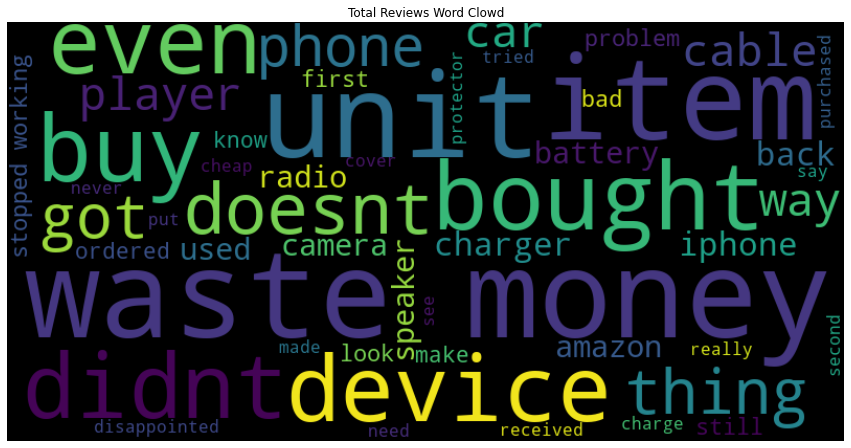

In [25]:
star_rating_1_reviews = reviews_data[reviews_data['star_rating'] == 1]['reviews_invalid_words_rem'].apply(lambda review: remove_most_common_words(review))
text = " ".join(review for review in star_rating_1_reviews)
wordcloud = WordCloud(background_color = 'black',width = 800, height = 400, max_words = 50)
wordcloud.generate(text)
fig = plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('Total Reviews Word Clowd')
plt.show()

In [26]:
stop = stopwords.words('english')
def remove_stopwords(review):
    return " ".join([i for i in str(review).split() if i not in stop])
reviews_data["reviews_ml"] = reviews_data["reviews_invalid_words_rem"].apply(lambda review: remove_stopwords(review))
reviews_data.head()

,star_rating,review_body,reviews_pun_off,reviews_stop_rem,reviews_after_2_letter_rem,reviews_lemmatized,reviews_invalid_words_rem,sentiment_score,sentiment_score_ratings,reviews_ml
0,1.0,funky run of the mill case but called a sports...,funky run of the mill case but called a sports...,funky run mill case called sports case photo l...,funky run mill case called sports case photo l...,funky run mill case called sport case photo la...,funky run mill case called sport case photo la...,0.1002,3.0,funky run mill case called sport case photo la...
1,1.0,the car dvr arrived packeged with a 16 gb card...,the car dvr arrived packeged with a 16 gb card...,car dvr arrived packeged 16 gb card inserted s...,car dvr arrived packeged card inserted card dv...,car dvr arrived packeged card inserted card dv...,car dvr arrived packeged card inserted card dv...,-0.0018,3.0,car dvr arrived packeged card inserted card dv...
2,3.0,not the best and will give you some good bass ...,not the best and will give you some good bass ...,not best give good bass blew rockford fosgates...,not best give good bass blew rockford fosgates...,not best give good bass blew rockford fosgates...,not best give good bass blew rockford fosgates...,-0.8259,1.0,best give good bass blew rockford fosgates box...
3,2.0,it stop working after 2 days i was really upse...,it stop working after 2 days i was really upse...,stop working 2 days really upset shipped time ...,stop working days really upset shipped time sa...,stop working day really upset shipped time sat...,stop working day really upset shipped time sat...,-0.5413,2.0,stop working day really upset shipped time sat...
4,2.0,this is a great product for the iphone however...,this is a great product for the iphone however...,great product iphone however needed ipod touch...,great product iphone however needed ipod touch...,great product iphone however needed ipod touch...,great product iphone however needed ipod touch...,0.9273,5.0,great product iphone however needed ipod touch...


In [27]:
inp = reviews_data['reviews_invalid_words_rem']
out = reviews_data['star_rating']
scores = {}

In [28]:
def text_model(inp, out, model, classifier_algorithm, lr):
    inp_transformed = model.fit_transform(inp)
    xtrain, xtest, ytrain, ytest = train_test_split(inp_transformed, out, test_size = 0.3)
    clf = OneVsRestClassifier(classifier_algorithm)
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    print(classification_report(ytest, ypred))
    accuracy_score = clf.score(xtest, ytest)  
    print("Accuracy Score : ", accuracy_score)
    f1 = f1_score(ytest, ypred, average = 'weighted')
    print("f1 Score : ", f1)
    pred = clf.predict(xtest)
    pred_prob = clf.predict_proba(xtest)
    scores[str(classifier_algorithm)[:-2] + "_" + str(model)[:-2]] = list([accuracy_score, f1])

    # roc curve for classes
    fpr = {}
    tpr = {}
    thresh ={}

    n_class = 5

    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(ytest, pred_prob[:,i], pos_label = i+1)
    plt.plot(fpr[0], tpr[0], color = 'red', label = 'Class 1 vs Rest')
    plt.plot(fpr[1], tpr[1], color = 'green', label = 'Class 2 vs Rest')
    plt.plot(fpr[2], tpr[2], color = 'blue', label = 'Class 3 vs Rest')
    plt.plot(fpr[3], tpr[3], color = 'purple', label = 'Class 4 vs Rest')
    plt.plot(fpr[4], tpr[4], color = 'brown', label = 'Class 5 vs Rest')
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.show()
    if lr == 1:
        words = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coefficient_df = pd.DataFrame({'Words' : words, 'Coefficients' : coef})
        coefficient_df['Coefficients'] = coefficient_df['Coefficients'] * -1
        fig, axs = plt.subplots(2,figsize = (20,15))
        axs[0].title.set_text('Top positive words')
        sns.barplot(x = 'Words', y = 'Coefficients', data = coefficient_df.sort_values('Coefficients', ascending = False).head(20),ax = axs[0])
        axs[1].title.set_text('Top negative words')
        axs[1].invert_yaxis()
        sns.barplot(x = 'Words', y = 'Coefficients', data = coefficient_df.sort_values('Coefficients', ascending = True).head(20), ax = axs[1])
        plt.show()

# LR and Count vectoriser

              precision    recall  f1-score   support

         1.0       0.74      0.80      0.77      8926
         2.0       0.74      0.71      0.72      9062
         3.0       0.69      0.66      0.67      9028
         4.0       0.66      0.58      0.62      8940
         5.0       0.69      0.76      0.72      9044

    accuracy                           0.70     45000
   macro avg       0.70      0.70      0.70     45000
weighted avg       0.70      0.70      0.70     45000

Accuracy Score :  0.7033111111111111
f1 Score :  0.7015411542771991


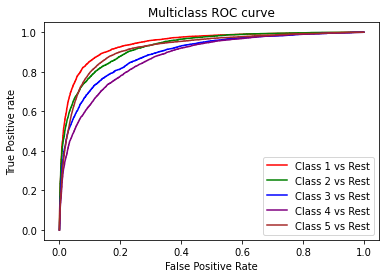

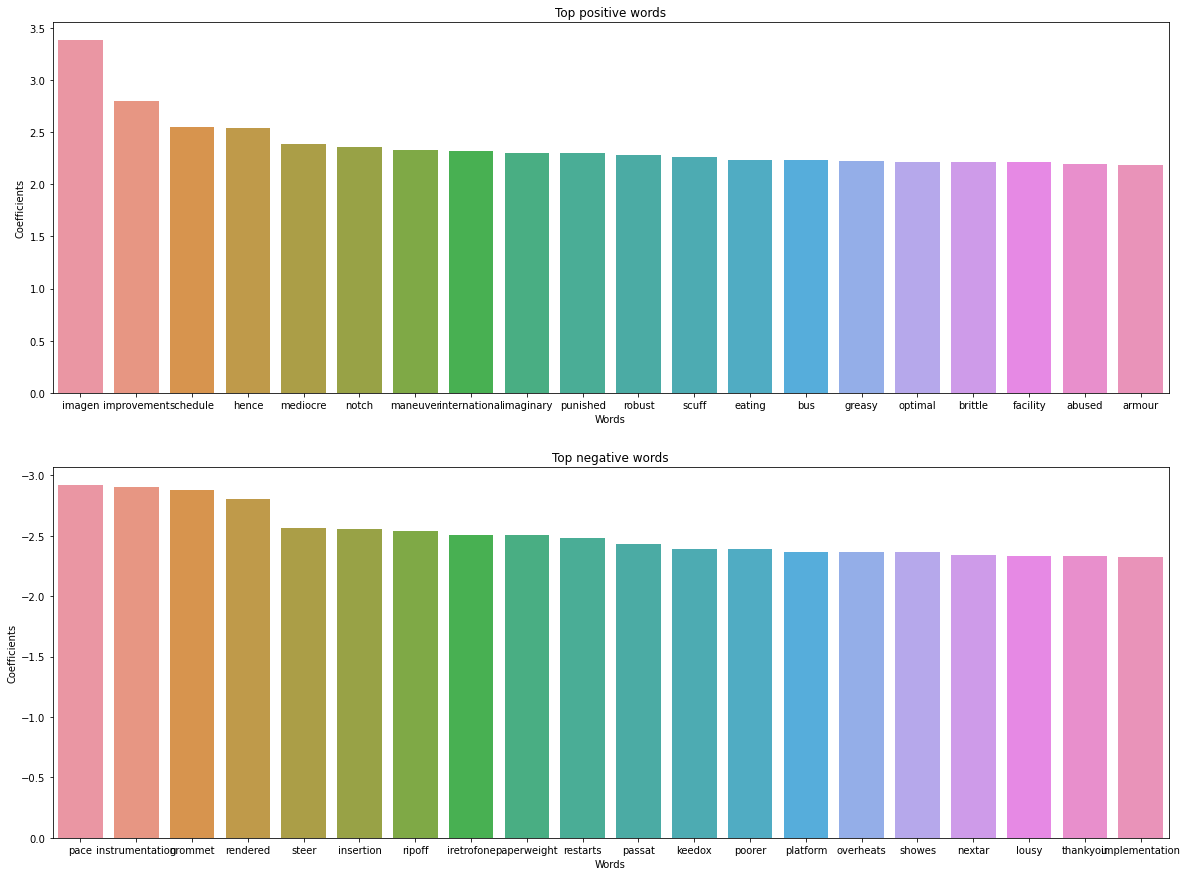

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(ngram_range = (1, 1))
text_model(inp, out, count_vect, LogisticRegression(max_iter = 2000), 1)

# LR and TF IDF vectoriser

              precision    recall  f1-score   support

         1.0       0.67      0.75      0.71      8941
         2.0       0.64      0.60      0.62      9133
         3.0       0.59      0.56      0.57      9012
         4.0       0.57      0.51      0.54      8926
         5.0       0.66      0.73      0.69      8988

    accuracy                           0.63     45000
   macro avg       0.63      0.63      0.63     45000
weighted avg       0.63      0.63      0.63     45000

Accuracy Score :  0.6302888888888889
f1 Score :  0.6274725672439823


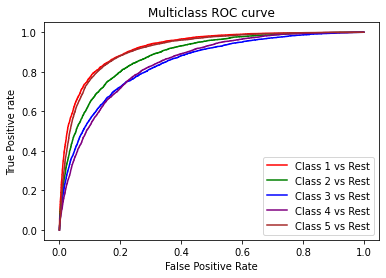

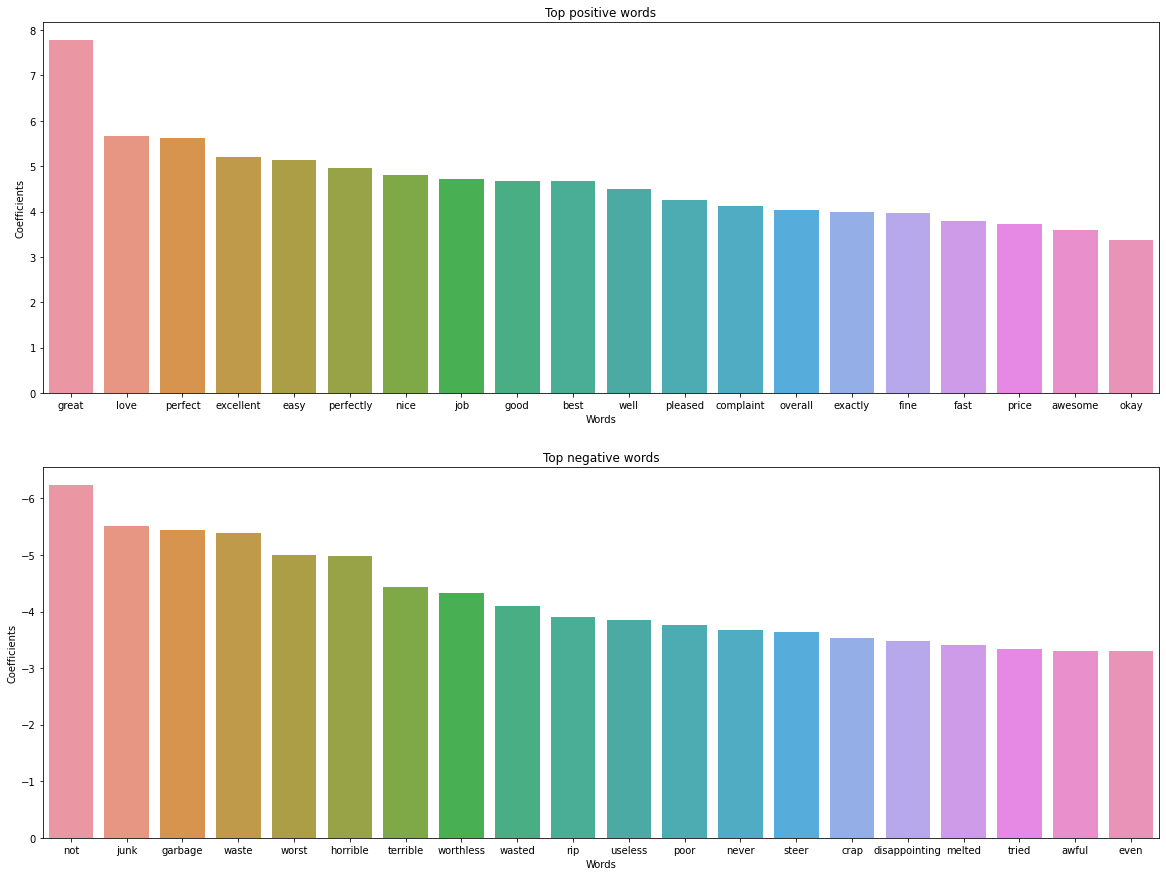

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
text_model(inp, out, tfidf, LogisticRegression(max_iter = 2000), 1)

# RF and Count Vectoriser

              precision    recall  f1-score   support

         1.0       0.92      0.96      0.94      8866
         2.0       0.98      0.97      0.97      9014
         3.0       0.94      0.93      0.94      8992
         4.0       0.86      0.84      0.85      9055
         5.0       0.85      0.85      0.85      9073

    accuracy                           0.91     45000
   macro avg       0.91      0.91      0.91     45000
weighted avg       0.91      0.91      0.91     45000

Accuracy Score :  0.9098666666666667
f1 Score :  0.909747762175302


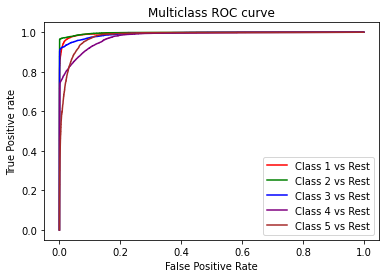

In [31]:
count_vect = CountVectorizer(ngram_range = (1, 1))
text_model(inp, out, count_vect, RandomForestClassifier(), 0)

# RF and TF IDF vectoriser

              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94      9053
         2.0       0.98      0.97      0.97      8963
         3.0       0.95      0.93      0.94      8984
         4.0       0.87      0.84      0.86      8974
         5.0       0.84      0.88      0.86      9026

    accuracy                           0.91     45000
   macro avg       0.91      0.91      0.91     45000
weighted avg       0.91      0.91      0.91     45000

Accuracy Score :  0.9130444444444444
f1 Score :  0.9130671272454843


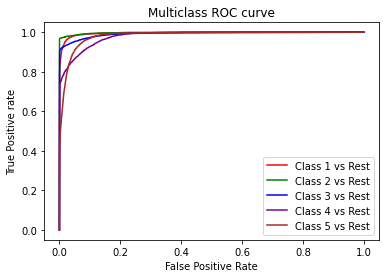

In [32]:
tfidf = TfidfVectorizer()
text_model(inp, out, tfidf, RandomForestClassifier(), 0)

Thus it is seen Random Forest and TF-IDF classifies better than other models

# TOPIC MODELLING

In [28]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


def nouns_adj(text):
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if   is_noun_adj(pos)]
    return ' '.join(nouns_adj)

[nltk_data] Downloading package punkt to /home/harrish/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/harrish/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [29]:
reviews_data["reviews_ml_only_nouns_adj"] = reviews_data["reviews_ml"].apply(lambda review: nouns_adj(review))
reviews_data.head()

,star_rating,review_body,reviews_pun_off,reviews_stop_rem,reviews_after_2_letter_rem,reviews_lemmatized,reviews_invalid_words_rem,sentiment_score,sentiment_score_ratings,reviews_ml,reviews_ml_only_nouns_adj
0,1.0,funky run of the mill case but called a sports...,funky run of the mill case but called a sports...,funky run mill case called sports case photo l...,funky run mill case called sports case photo l...,funky run mill case called sport case photo la...,funky run mill case called sport case photo la...,0.1002,3.0,funky run mill case called sport case photo la...,funky mill case sport case photo nothing realy...
1,1.0,the car dvr arrived packeged with a 16 gb card...,the car dvr arrived packeged with a 16 gb card...,car dvr arrived packeged 16 gb card inserted s...,car dvr arrived packeged card inserted card dv...,car dvr arrived packeged card inserted card dv...,car dvr arrived packeged card inserted card dv...,-0.0018,3.0,car dvr arrived packeged card inserted card dv...,car dvr packeged card card dvr computer window...
2,3.0,not the best and will give you some good bass ...,not the best and will give you some good bass ...,not best give good bass blew rockford fosgates...,not best give good bass blew rockford fosgates...,not best give good bass blew rockford fosgates...,not best give good bass blew rockford fosgates...,-0.8259,1.0,best give good bass blew rockford fosgates box...,good bass blew rockford box need tweeter unhoo...
3,2.0,it stop working after 2 days i was really upse...,it stop working after 2 days i was really upse...,stop working 2 days really upset shipped time ...,stop working days really upset shipped time sa...,stop working day really upset shipped time sat...,stop working day really upset shipped time sat...,-0.5413,2.0,stop working day really upset shipped time sat...,stop day shipped time satisfied stop
4,2.0,this is a great product for the iphone however...,this is a great product for the iphone however...,great product iphone however needed ipod touch...,great product iphone however needed ipod touch...,great product iphone however needed ipod touch...,great product iphone however needed ipod touch...,0.9273,5.0,great product iphone however needed ipod touch...,great product iphone ipod touch ipod wasnt goo...


In [45]:
corpora = reviews_data["reviews_ml"].values
tokenized = [corpus.split(" ") for corpus in corpora]
vocabulary = Dictionary(tokenized)
vocabulary.filter_extremes(no_below = 10, no_above = 0.2)
bow = [vocabulary.doc2bow(doc) for doc in tokenized]

In [46]:
corpora_adj_nouns = reviews_data["reviews_ml_only_nouns_adj"].values
tokenized_adj_nouns = [corpus.split(" ") for corpus in corpora_adj_nouns]
vocabulary_adj_nouns = Dictionary(tokenized_adj_nouns)
vocabulary_adj_nouns.filter_extremes(no_below = 10, no_above = 0.2)
bow_adj_nouns = [vocabulary_adj_nouns.doc2bow(doc) for doc in tokenized_adj_nouns]

In [57]:
def compute_coherence_values(dictionary, corpus, texts, limit, start = 2, step = 2):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus = corpus, id2word = dictionary, num_topics = num_topics, random_state = 30)
        model_list.append(model)
        coherencemodel = CoherenceModel(model = model, texts = texts, dictionary = dictionary, coherence = 'c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

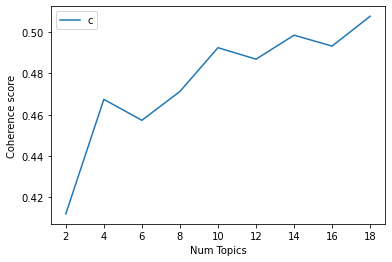

In [58]:
model_list, coherence_values = compute_coherence_values(dictionary = vocabulary, corpus = bow, texts = tokenized, start = 2, limit = 20, step = 2)
limit = 20
start = 2
step = 2
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [59]:
lda_model = LdaModel(corpus = bow, id2word = vocabulary, num_topics = 14, random_state = 30)

In [60]:
for topic in range(0, 14):
    print(f"\nTopic {topic+1}:")
    for token, frequency in lda_model.show_topic(topic, topn = 20):
        print(f" {token}, {frequency}")


Topic 1:
 great, 0.07115708291530609
 product, 0.03534905984997749
 price, 0.03394500911235809
 good, 0.03336518630385399
 easy, 0.024113912135362625
 recommend, 0.023617081344127655
 would, 0.022527918219566345
 use, 0.02088489755988121
 quality, 0.016745010390877724
 really, 0.010614666156470776
 buy, 0.010347360745072365
 well, 0.010179697535932064
 time, 0.01012223120778799
 love, 0.00977240689098835
 need, 0.008392460644245148
 best, 0.0076043689623475075
 anyone, 0.007481941021978855
 excellent, 0.007434510160237551
 highly, 0.007314510643482208
 definitely, 0.006001830101013184

Topic 2:
 cable, 0.048746488988399506
 charge, 0.03941628709435463
 charger, 0.03710925579071045
 phone, 0.03190087899565697
 iphone, 0.029380517080426216
 cord, 0.019775185734033585
 usb, 0.019338995218276978
 plug, 0.01886732503771782
 charging, 0.01860995963215828
 car, 0.015535001643002033
 device, 0.01345960795879364
 apple, 0.013307292014360428
 use, 0.013204249553382397
 power, 0.0124417403712868

In [51]:
# topic 1 : radio and manual
# topic 2 : audio systems and players
# topic 3 : camera
# topic 4 : battery and chargers 
# topic 5 : sound system
# topic 6 : screen protector
# topic 7 : car softwares and accessories
# topic 8 : amazon delivery
# topic 9 : fit bands
# topic 10 : liked featurs
# topic 11 : working of products
# topic 12 : phone cases

In [66]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, bow, vocabulary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.165831 -0.002322       1        1  10.866178
2     -0.135646 -0.036266       2        1  10.404914
7     -0.035356  0.185572       3        1  10.042847
5     -0.072434  0.198880       4        1   9.639476
10    -0.043678 -0.109685       5        1   8.197234
1     -0.112562  0.024040       6        1   8.018882
4     -0.161092  0.051341       7        1   7.134492
0      0.118806 -0.046556       8        1   6.438873
8     -0.024787  0.050629       9        1   6.068301
9     -0.066965 -0.232529      10        1   5.632110
11     0.013021  0.033729      11        1   5.318941
6     -0.051116 -0.152024      12        1   4.689510
13     0.211763 -0.069051      13        1   4.105445
3      0.194216  0.104241      14        1   3.442798, topic_info=       Term          Freq         Total Category  logprob  loglift
3      case  46083.000000  46083.000000  Default  30.0000  30.0000
56   screen  23741.000000  23741.000000  Default  29.0000  29.0000
103   cable  16525.000000  16525.000000  Default  28.0000  28.0000
87    great  34653.000000  34653.000000  Default  27.0000  27.0000
293   sound  22709.000000  22709.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
269     use   1331.579842  31717.575086  Topic14  -4.6909   0.1984
87    great   1327.193595  34653.947353  Topic14  -4.6942   0.1065
50   really   1128.655723  17658.104050  Topic14  -4.8562   0.6187
43     good   1036.375983  37250.417023  Topic14  -4.9415  -0.2130
100   would   1005.845939  37962.849119  Topic14  -4.9714  -0.2619

[1082 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
2076      6  0.995027        
2707      8  0.995433     aaa
102       1  0.023450    able
102       2  0.110743    able
102       3  0.025870    able
...     ...       ...     ...
2507      8  0.993876   young
1461      1  0.998165  zipper
3633      7  0.990926    zoom
3633      9  0.004146    zoom
875      10  0.999186    zune

[3835 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 3, 8, 6, 11, 2, 5, 1, 9, 10, 12, 7, 14, 4])

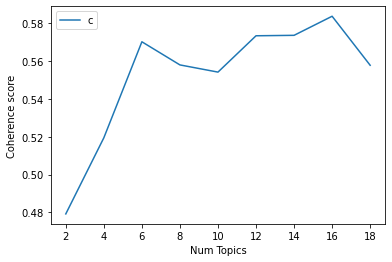

In [61]:
# only adjectives and nouns
model_list, coherence_values = compute_coherence_values(dictionary = vocabulary_adj_nouns, corpus = bow_adj_nouns, texts = tokenized_adj_nouns, start = 2, limit = 20, step = 2)
limit = 20
start = 2
step = 2
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [62]:
lda_model_adj_nouns = LdaModel(corpus = bow_adj_nouns, id2word = vocabulary_adj_nouns, num_topics = 16, random_state = 30)

In [63]:
for topic in range(0, 16):
    print(f"\nTopic {topic+1}:")
    for token, frequency in lda_model_adj_nouns.show_topic(topic, topn = 25):
        print(f" {token}, {frequency}")


Topic 1:
 quality, 0.07707185298204422
 cheap, 0.03717585280537605
 product, 0.036807600408792496
 good, 0.036768730729818344
 didnt, 0.03433523327112198
 poor, 0.025172477588057518
 original, 0.017464257776737213
 star, 0.01744586043059826
 tape, 0.01558699831366539
 description, 0.012772669084370136
 bad, 0.012662489898502827
 pay, 0.012269173748791218
 brand, 0.01224058773368597
 better, 0.009889613837003708
 new, 0.00902952067553997
 look, 0.008786393329501152
 price, 0.007863578386604786
 reason, 0.007739406079053879
 model, 0.007542066741734743
 much, 0.007468001917004585
 high, 0.007320985198020935
 fit, 0.007048582658171654
 item, 0.007028025109320879
 something, 0.006772488355636597
 plastic, 0.0065895384177565575

Topic 2:
 box, 0.04248980060219765
 tool, 0.01890498213469982
 kit, 0.018273955211043358
 water, 0.015994908288121223
 satisfied, 0.01226766873151064
 heavy, 0.011733274906873703
 panel, 0.011522372253239155
 handle, 0.010070925578474998
 open, 0.00973999872803688


In [64]:
# topic 1 : liked features of a product
# topic 2 : usage time
# topic 3 : chargers and connectors
# topic 4 : electrical technical reviews
# topic 5 : cases for ipod
# topic 6 : audio system
# topic 7 : iphone cases
# topic 8 : fit band
# topic 9 : screen protector
# topic 10 : car accessories
# topic 11 : holders for cup, gps
# topic 12 : battery and chargers
# topic 13 : replaced,refunded and returned products
# topic 14 : special features
# topic 15 : disliked features
# topic 16 : manual and support 

In [65]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model_adj_nouns, bow_adj_nouns, vocabulary_adj_nouns)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11    -0.028958  0.194831       1        1  11.098521
5     -0.095564 -0.094304       2        1   8.375211
12     0.016301 -0.154460       3        1   7.736179
14     0.247958 -0.072758       4        1   7.718215
10    -0.146291 -0.118739       5        1   7.646179
3      0.164883  0.021429       6        1   7.278821
9     -0.095839 -0.116527       7        1   6.969413
2     -0.110612 -0.068721       8        1   6.477949
13     0.132906 -0.070981       9        1   5.885141
7     -0.037916  0.188387      10        1   5.719016
8     -0.005096  0.100789      11        1   5.264180
0      0.225593  0.038023      12        1   4.847672
4     -0.156187 -0.003646      13        1   4.254039
6     -0.025155 -0.157055      14        1   4.018585
15    -0.108047  0.195293      15        1   3.810472
1      0.022025  0.118437      16        1   2.900406, topic_info=       Term          Freq         Total Category  logprob  loglift
2      case  45052.000000  45052.000000  Default  30.0000  30.0000
33   screen  23643.000000  23643.000000  Default  29.0000  29.0000
426    unit  18623.000000  18623.000000  Default  28.0000  28.0000
7      ipod  25791.000000  25791.000000  Default  27.0000  27.0000
64    cable  16696.000000  16696.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
267  little    757.360824  15516.010034  Topic16  -4.6665   0.5205
132     get    634.749041  10238.372366  Topic16  -4.8431   0.7597
51     time    691.319670  27178.735523  Topic16  -4.7578  -0.1313
896    real    561.547957   2931.492490  Topic16  -4.9657   1.8877
230  future    489.272430    844.152043  Topic16  -5.1035   2.9949

[1123 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1475      4  0.999335        
1961      2  0.995427     aaa
63        1  0.056824    able
63        2  0.034125    able
63        3  0.158597    able
...     ...       ...     ...
2269      7  0.998196     zen
1851     16  0.998446  zipper
2683      7  0.996248    zoom
594       3  0.438541    zune
594      10  0.560312    zune

[3602 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 6, 13, 15, 11, 4, 10, 3, 14, 8, 9, 1, 5, 7, 16, 2])

# Thus it is seen that reviews with nouns and adjectives alone gives better classification for topics